# Lesson 1
The pandas library is used for all the data analysis excluding a small piece of the data presentation section. The matplotlib library will only be needed for the data presentation section. Importing the libraries is the first step we will take in the lesson.

In [3]:
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [5]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.0 |Anaconda 4.3.0 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version 0.19.2
Matplotlib version 2.0.0


## Create A Data 

In [11]:
# The initial set of the city names and their population 

names= ['Houston','Tirana','Boston','Krupa']
population= [20093,343434,1234,31111,]

to merge these two list we use the zip function


In [14]:
CitySet=list(zip(names,population))

CitySet

[('Houston', 20093), ('Tirana', 343434), ('Boston', 1234), ('Krupa', 31111)]

Now we jsut created the dataset and then we will use the pandas library to export this data into a csv file

df will be a DataFrame Object.

In [20]:
df = pd.DataFrame(data= CitySet, columns=['Names', 'Population'])
df


,Names,Population
0,Houston,20093
1,Tirana,343434
2,Boston,1234
3,Krupa,31111


Export the dataframe to a csv file. We can name the file births1880.csv. The function to_csv will be used to export the file. The file will be saved in the same location of the notebook unless specified otherwise.

In [23]:
df.to_csv('births1880.csv',index=False,header=False)



## Get Data¶


To pull in the csv file, we will use the pandas function read_csv. Let us take a look at this function and what inputs it takes.

In [39]:
Location = r'/Users/geraldo/Desktop/Spring2017/Comp 4353 Data Mining/Studying/births1880.csv'

df = pd.read_csv(Location)




Notice the r before the string. Since the slashes are special characters, prefixing the string with a r will escape the whole string.

In [40]:
df

,Houston,20093
0,Tirana,343434
1,Boston,1234
2,Krupa,31111


This brings us the our first problem of the exercise. The read_csv function treated the first record in the csv file as the header names. This is obviously not correct since the text file did not provide us with header names.

To correct this we will pass the header parameter to the read_csv function and set it to None (means null in python).

In [41]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,Houston,20093
1,Tirana,343434
2,Boston,1234
3,Krupa,31111


f we wanted to give the columns specific names, we would have to pass another paramter called names. We can also omit the header parameter.

In [42]:
df = pd.read_csv(Location, names=['Names','Population'])
df

,Names,Population
0,Houston,20093
1,Tirana,343434
2,Boston,1234
3,Krupa,31111


We can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the index of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.

[Names, Births] can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.

Delete the csv file now that we are done using it.


In [43]:
import os
os.remove(Location)

## Prepare Data

In [44]:
# Check data type of the columns
df.dtypes

Names         object
Population     int64
dtype: object

In [45]:
# Check data type of Population column
df.Population.dtype

dtype('int64')

As we can see the Births column is of type int64, thus no floats (decimal numbers) or alpha numeric characters will be present in this column.

## Analyze Data

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

 - Sort the dataframe and select the top row
 - Use the max() attribute to find the maximum value

In [46]:
# Method 1:
Sorted = df.sort_values(['Population'], ascending=False)
Sorted.head(1)

,Names,Population
1,Tirana,343434


In [47]:
# Method 2:
df['Population'].max()

343434

## Present Data

plot() is a convinient attribute where pandas lets you painlessly plot the data in your dataframe. 


The most popular name


,Names,Population
1,Tirana,343434


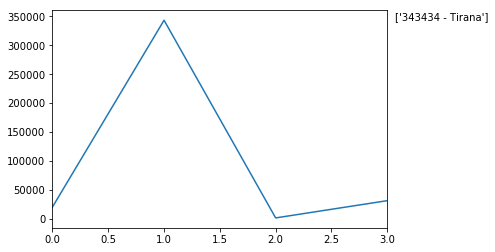

In [48]:
# Create graph
df['Population'].plot()

# Maximum value in the data set
MaxValue = df['Population'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Population'] == df['Population'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Population'] == df['Population'].max()]
#Sorted.head(1) can also be used